# Сборный проект

Предположим, я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Передо мной данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозирую ли я продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**  
- *Name* — название игры  
- *Platform* — платформа  
- *Year_of_Release* — год выпуска  
- *Genre* — жанр игры  
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)  
- *EU_sales* — продажи в Европе (миллионы проданных копий)  
- *JP_sales* — продажи в Японии (миллионы проданных копий)  
- *Other_sales* — продажи в других странах (миллионы проданных копий)  
- *Critic_Score* — оценка критиков (максимум 100)  
- *User_Score* — оценка пользователей (максимум 10)  
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Критерии оценки проекта**

- Как выглядит описание выявленных в данных проблемы?  
- Как готовите датасет к анализу?  
- Какие строите графики для распределений и как их объясняете?  
- Формулируете ли альтернативную и нулевую гипотезы?  
- Какие методы применяете, чтобы их проверить?  
- Объясняете результат проверки гипотезы или нет?  
- Соблюдаете ли структуру проекта и поддерживаете аккуратность кода?  
- Какие выводы делаете?  
- Оставляете ли комментарии к шагам?

In [1196]:
#Импортируем необходимые для работы над проектом библиотеки:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [1197]:
# Загрузим исходный датасет:

try:
    games_df = pd.read_csv('C:/Users/zephy/Composite_project_1/games.csv')
except:
    games_df = pd.read_csv('/datasets/games.csv')

In [1198]:
display(games_df.head())

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [1199]:
# Ознакомимся с данными:

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В результате видно, что:
- величина массива составляет 16715 строк,
- колонки с данными о продажах и 'Platform' не имеют пропусков,
- год выпуска представлен типом данных 'float64' 
- много пропусков в 'Critic_Score', 'User_Score' и 'Rating'.

Далее подробнее изучим каждую колонку, а также количество пропущенных данных.

## Шаг 2. Подготовка данных

### Приведем названия колонок к змеиному_регистру:

In [1200]:
# Получим списком названия колонок датафрейма:

index_list = games_df.columns.to_list()
#print(index_list)

In [1201]:
# Поочередно приведем их символы к нижнему регистру:

for i in range(len(index_list)):
    index_list[i] = index_list[i].lower()
#print(index_list)

In [1202]:
# Назначим столбцам датафрейма корректные названия: 

games_df.columns = index_list
games_df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Успешно!

### Преобразование данных

In [1203]:
# Проверка на явные дубликаты:

games_df.duplicated().sum()

0

Явные дубликаты в данных отсутствуют.

**name**

In [1204]:
games_df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверим столбцы на неявные дубликаты:

In [1205]:
# Ознакомимся с пропущенными значениями:

games_df.loc[games_df['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

У двух записей помимо имен также отсутствуют данные о жанре и рейтинге ESRB.   
Однако, у них одинаковый год выпуска.   
Есть данные о продажах для США и европы - в первом случае, для Японии - во втором.
Удалим эти значения.

In [1206]:
games_df = games_df.drop(index=[659,14244])
games_df['name'].isna().sum()

0

**year_of_release**

In [1207]:
games_df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

В нашем распоряжении данные по играм, вышедшим с 1980 по 2016 годы.  
Половина из них вышла до 2008 г.

In [1208]:
# Ознакомимся с нуникальными значениями year_of_release:

games_df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [1209]:
games_df['year_of_release'].isna().sum()

269

Колличество пропущенных значений - 269, или 1.6 % от общего числа значений.  
Заменим пропуски условным значением - 1965 г.

In [1210]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(1965).astype('int')

In [1211]:
# Проверяем:

games_df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int32

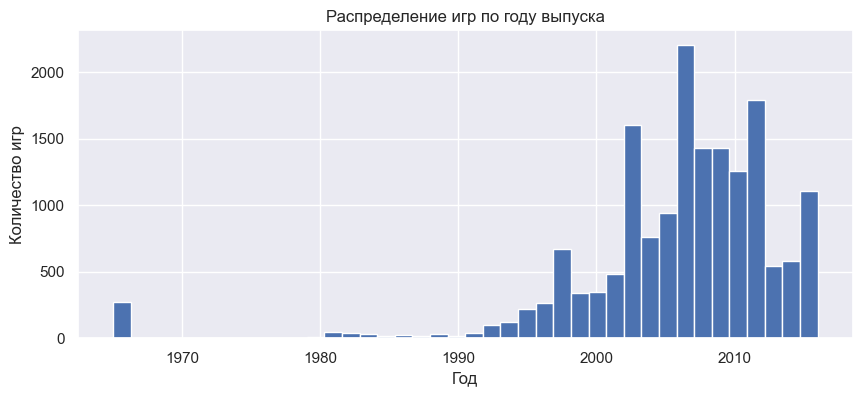

In [1212]:
games_df['year_of_release'].hist(bins=40, figsize=[10,4]);
plt.title('Распределение игр по году выпуска');
plt.xlabel('Год');
plt.ylabel('Количество игр');

Так, данные из столбца 'year_of_release' были преобразованы из *float64* в *int32*

**user_score**

In [1213]:
# Ознакомимся с нуникальными значениями оценки пользователей:

games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Все значения лежат в диапазоне от 0 до 10, как и положено.  
Есть пропущенные значения "nan".

In [1216]:
# Определим количество пропущенных значений:

len_games_df_scr_null = games_df['user_score'].isna().sum()
print(len_games_df_scr_null)

6699


In [1222]:
# Определим количество значений, нахоходящихся в процессе формирования (tbd):
len_games_df_tbd = len(games_df.loc[games_df['user_score'] == 'tbd'])
print('Значений tbd:', len_games_df_tbd)

# Всего строк датафрейма:
len_games_df_scr = len(games_df['user_score'])
print('Величина датафрейма:', len_games_df_scr)

print('Доля tbd:', len_games_df_tbd / len_games_df_scr * 100)
print('Доля пропусков:', len_games_df_scr_null/len_games_df_scr * 100)

Значений tbd: 2424
Величина датафрейма: 16713
Доля tbd: 14.503679770238737
Доля пропусков: 40.0825704541375


Из 16713 строк датасета:  
- 2424 значения 'tbd' (14.5 %)  
- 6701 пропущенных значений (40 %)  

Нерабочих значений больше половины. Получить / рассчитать их не представляется возможным.  

В данном случае уместно заменить их на "0.5", чтобы в дальнейшем со значениями оценки пользователей в целом можно было работать, но при этом заменяемые значения не оказывали бы влияние на выборку и имели бы характерный вид.

In [1141]:
# Заменим значения 'nan' и'tbd' на "условные" 0.5:

games_df['user_score'].fillna(0.5, inplace=True)
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = 0.5

In [1142]:
# Поскольку теперь все значения числовые, меняем тип данных столбца:

games_df['user_score'] = games_df['user_score'].astype('float')
games_df['user_score'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16713 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype  
--------------  -----  
16713 non-null  float64
dtypes: float64(1)
memory usage: 261.1 KB


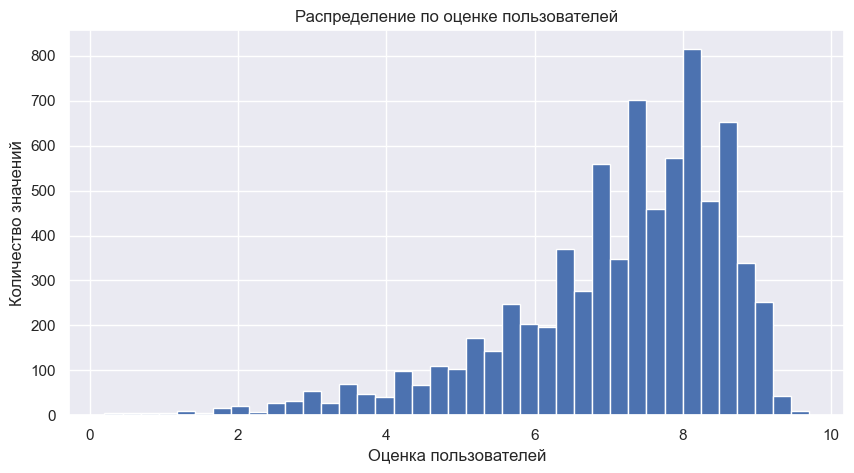

In [1015]:
# Рассмотрим гистограмму распределения значений (без учета значений 0.5):

games_df.loc[games_df['user_score']>0.5]['user_score'].hist(bins=39, figsize=[10,5]);
plt.title('Распределение по оценке пользователей');
plt.xlabel('Оценка пользователей');
plt.ylabel('Количество значений');

Распределение значений в форме колокола, со смещением вправо.  

**critic_score**

In [1016]:
# Ознакомимся с нуникальными значениями оценки критиков:

games_df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Все значения лежат в диапазоне от 0 до 100, аномалий не видно.
Есть пропущенные значения "nan".

In [1017]:
# Определим количество и долю пропущенных значений:

print('Количество пропусков:', games_df['critic_score'].isna().sum())
print('Количество строк в датасете:', len(games_df['critic_score']))
print('Доля пропусков от общего числа значений:', 8578/len(games_df['critic_score'])*100)

Количество пропусков: 8576
Количество строк в датасете: 16713
Доля пропусков от общего числа значений: 51.325315622569256


Пропущенные значения составляют 51.3 %, т.е. больше половины от всех значений (8587 из 16715).  

В целях дальнейшего анализа оценки ирг критиками пропуски заменим на "подсвеченные" значения "0.5".

In [1018]:
# Заменим значения 'nan' на "условные" 0.5:

games_df['critic_score'].fillna(0.5, inplace=True)
# games_df['critic_score'].isna().sum()

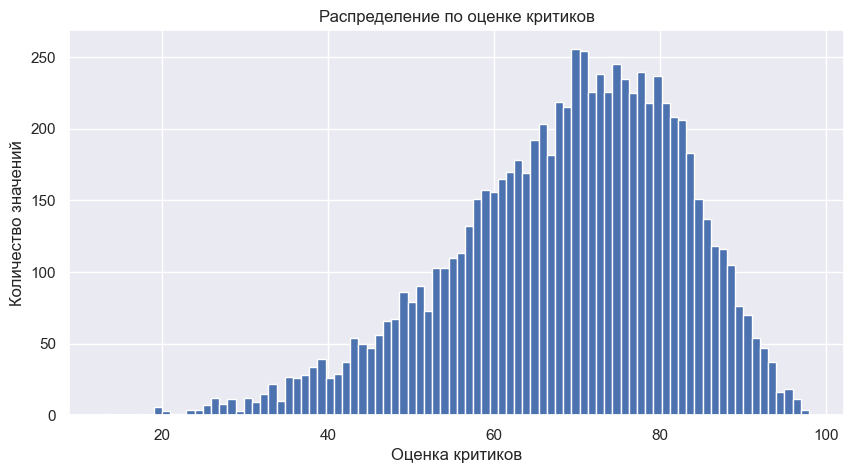

In [1019]:
# Рассмотрим гистограмму распределения значений (без учета условных значений 0.5):

games_df.loc[games_df['critic_score']>0.5]['critic_score'].hist(bins=86, figsize=[10,5]);
plt.title('Распределение по оценке критиков');
plt.xlabel('Оценка критиков');
plt.ylabel('Количество значений');

Распределение Пуассона со смещением вершины вправо.  
Пиковое значение оценки - 70 из 100 баллов.

**rating**

In [1020]:
games_df['rating'].describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [1021]:
games_df['rating'].isna().sum()

6764

Полагаю, пропущеные значения рейтинга ESRB, рейтингового агенства США и Канады, будет уместно заменить на "tbd" (To Be Determinated - На Стадии Формирования / не определен), поскольку игра может находиться в процессе оценки или быть оценена позже по различным причинам.  
Для игр из европы и Японии этот рейтинг вообще мог не составляться.

In [1022]:
games_df['rating'].fillna('tbd', inplace=True)

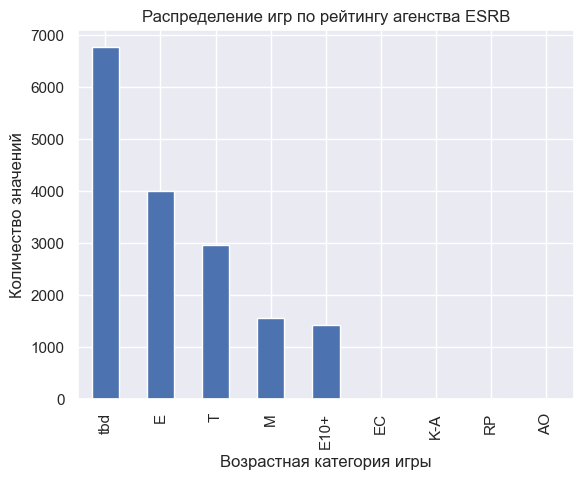

In [1023]:
games_df['rating'].value_counts().plot(kind='bar');
plt.title('Распределение игр по рейтингу агенства ESRB');
plt.xlabel('Возрастная категория игры');
plt.ylabel('Количество значений');

In [1025]:
# Выявим наиболее часто встречающиеся названия игр:

print(games_df['name'].value_counts())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64


*Need for Speed: Most Wanted* встречается целых 12 раз!   
Нужно разобраться, в чем дело.

In [1143]:
# Рассмотрим детально эти 12 строк:

display(games_df.query('name == "Need for Speed: Most Wanted"'))

name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2             2005  Racing   
523    Need for Speed: Most Wanted      PS3             2012  Racing   
1190   Need for Speed: Most Wanted     X360             2012  Racing   
1591   Need for Speed: Most Wanted     X360             2005  Racing   
1998   Need for Speed: Most Wanted       XB             2005  Racing   
2048   Need for Speed: Most Wanted      PSV             2012  Racing   
3581   Need for Speed: Most Wanted       GC             2005  Racing   
5972   Need for Speed: Most Wanted       PC             2005  Racing   
6273   Need for Speed: Most Wanted     WiiU             2013  Racing   
6410   Need for Speed: Most Wanted       DS             2005  Racing   
6473   Need for Speed: Most Wanted      GBA             2005  Racing   
11715  Need for Speed: Most Wanted       PC             2012  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
253        2.03      1.79      0.08         0.47          82.0         9.1   
523        0.71      1.46      0.06         0.58           NaN         0.5   
1190       0.62      0.78      0.01         0.15          83.0         8.5   
1591       1.00      0.13      0.02         0.10          83.0         8.5   
1998       0.53      0.46      0.00         0.05          83.0         8.8   
2048       0.33      0.45      0.01         0.22           NaN         0.5   
3581       0.43      0.11      0.00         0.02          80.0         9.1   
5972       0.02      0.23      0.00         0.04          82.0         8.5   
6273       0.13      0.12      0.00         0.02           NaN         0.5   
6410       0.24      0.01      0.00         0.02          45.0         6.1   
6473       0.19      0.07      0.00         0.00           NaN         8.3   
11715      0.00      0.06      0.00         0.02          82.0         8.5   

      rating  
253        T  
523      NaN  
1190       T  
1591       T  
1998       T  
2048     NaN  
3581       T  
5972       T  
6273     NaN  
6410       E  
6473       E  
11715      T

Такое количество строк с одинаковым названием игры *Need for Speed: Most Wanted* в датасет (12 шт) обусловлено различными игровыми платформами, для которых эта игра выпускалась. В записях датасета по этой игре дважды присутствуют 2 строки с одинаковыми платформами (*PC* и *X360*), но разным годом выпуска (*2005* и *2012*). Это связано с тем, игра 2012 года является перезапуском *Need for Speed: Most Wanted* 2005 года.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [1028]:
# Добавим столбец о суммарных продажах во всех регионах:

games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
display(games_df['total_sales'])
games_df['total_sales'].describe()

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Общий объем значений - 16713.  
75 % игр проданы в размере не превышающем 470 тыс. копий.  
Максимальное значение продаж для игры - 82 млн 540 тыс. копий.

## Шаг 3. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

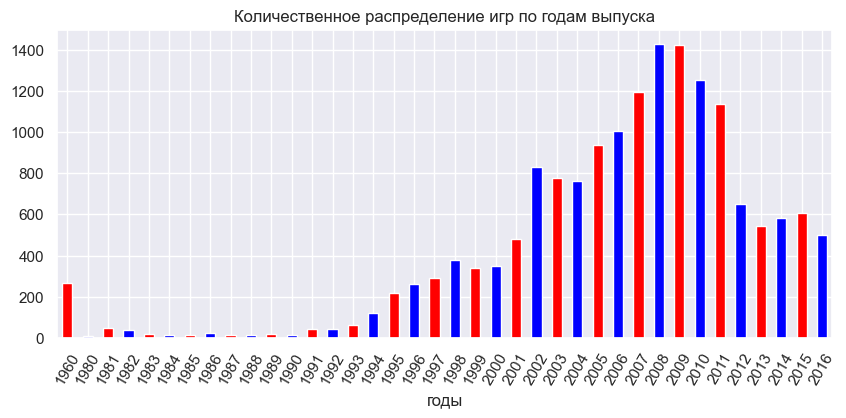

In [1029]:
games_df['year_of_release'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=[10,4], color= ["red", "blue"])
plt.title('Количественное распределение игр по годам выпуска')
plt.xlabel('годы')
plt.xticks(rotation=60)
plt.show()

In [1030]:
# Численные значения:
#pd.pivot_table(games_df, index = 'year_of_release', values = 'name', aggfunc='count')

**Выводы:**  
* Локальные максимумы графика распределения отмечаются на 1998 (379 игр), 2002 (829 игр) и 2008-2009 (1426-1427 игр) годах.    
* В целом индустрия игр до начала 1990-х годов была слабо представлена, ее рост начался в середине последнего десятилетия 20 века.  
* В начале 2000-х произошло кратное увеличение игрового рынка, а пиковое значение приходится на 2008 год: было выпущено 1427 игр. Столь бурный рост индустрии можно объяснить темпами развития технологий (как "железа", так и совершенствованием языков программирования), широкой доступностью персональных компьютеров, массового доступа к интернету.    
* Последующий спад, возможно, связан с усложнением процесса созданя самих игр (требования к сюжету, элементам графики), изменением платформ - общим увеличением цикла создания игры.  

Стоит отметить, что на 2008-2009 годы приходится мировой финансовый кризис (одна из волн), который мог создать предпосылки для оптимизации затрат на продукт, сокращения штата разработчиков.  
Вероятно, что по мере роста индустрии и вследствие конкуренцции, рынок заняли крупные игроки, обладающие ресурсами, нацеленные на уменьшение количества выпускаемых игр в пользу их качества.  
 
Вследствие перечисленного выше, полезнее для анализа скорее окажутся данные за определенный период, нежели за всю историю существования индустрии.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

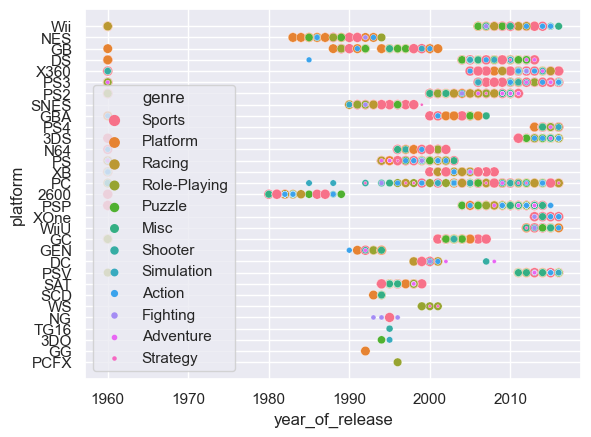

In [1031]:
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="genre"\
                ,data=games_df\
                ,sizes=(5, 50));

На графике прослеживается "время жизни" платформ: 
- *2600* была актуальна для игр до 1990 г;
- игры под платформы *NES, GB, SNES, N64, PS, GEN, SAT, NG, TG16, 3DO, GG, PCFX* в основном писались до 2000 года;  
- наиболее современными являются платформы *Wii, PS4, 3DS, XONE, WiiU, PSV* - на них выпускают игры с 2010-х годов;  
- платформа *PC* актуальна во все времена)  

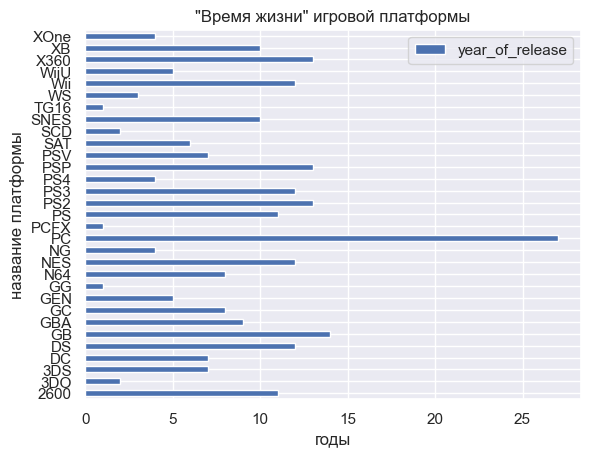

In [1032]:
# Визуализируем "время жизни" каждой из представленных в датасете игровых платформ:

uniq_year_platform = games_df[['year_of_release', 'platform']].drop_duplicates()
pivot_livetime_platform = pd.pivot_table(uniq_year_platform, 
               index='platform', 
               values='year_of_release', 
               aggfunc='count'
              )
pivot_livetime_platform.plot(kind='barh',
                     title='"Время жизни" игровой платформы',
                     xlabel='годы',
                     ylabel='название платформы');

In [1034]:
pivot_livetime_platform.describe()

year_of_release
count        31.000000
mean          8.193548
std           5.412451
min           1.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          27.000000

In [1224]:
# Средняя скорость появления новых платформ (шт в год):

len(games_df['platform'].unique())/(2016 - 1980)

0.8611111111111112

Медианное время жизни платформы составляет 8 лет, среднее - 8.2 года.  
Несколько платформ жили всего 1-2 года, компьютерные же игры были всегда.  
Межквартильный размах составляет от 4 до 12 лет - столько "живёт" половина от всех платформ.   
Чаще, чем раз в год (приблизительно раз в 10-11 месяцев) появляется новая игровая платформа.

In [1036]:
# Подготовим сводную таблицу суммарных продаж для всех платформ:

pivot_sales_platform = pd.pivot_table(games_df, 
                                      index='platform', 
                                      values='total_sales', 
                                      aggfunc='sum').sort_values(by='total_sales', 
                                                                 ascending=False)
# Выделим наиболее продаваемые игры игровых платформ:

print(pivot_sales_platform.head())

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12


In [1037]:
# списком:

top5_sales_list = pivot_sales_platform['total_sales'][:5].index.tolist()
top5_sales_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

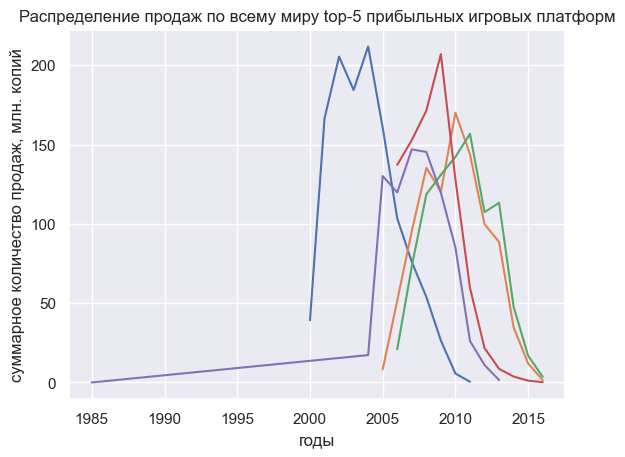

In [1038]:
# Построим графики распределения общего кол-ва продаж для top-5 платформ:

for i in top5_sales_list:
    game_platf_i = games_df.loc[((games_df['platform'] == i) & (games_df['year_of_release'] > 1979))]
    pivot_revenue_i = pd.pivot_table(game_platf_i, index='year_of_release', values='total_sales', aggfunc='sum')
    plt.plot(pivot_revenue_i)
    plt.title('Распределение продаж по всему миру top-5 прибыльных игровых платформ')
    plt.xlabel('годы');
    plt.ylabel('суммарное количество продаж, млн. копий');

In [1039]:
print('Распределение продаж между самыми популярными платформами в истории:', '\n', pivot_sales_platform['total_sales'][top5_sales_list])
print('\nСуммарное значение проданных игр из top-5 игровых платформ:', pivot_sales_platform['total_sales'][top5_sales_list].sum(), 'млн. копий')

Распределение продаж между самыми популярными платформами в истории: 
 platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

Суммарное значение проданных игр из top-5 игровых платформ: 4880.47 млн. копий


За всю историю на PS2 от Sony было продано более 1.25 млрд. копий игр!

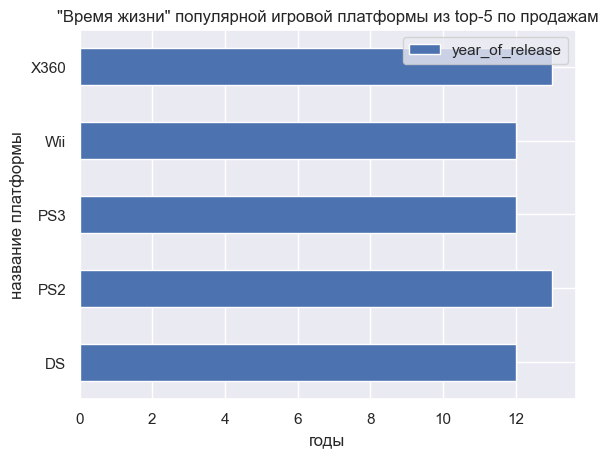

In [1040]:
# Визуализируем "время жизни" самых продаваемых top-5 игровых платформ:

uniq_year_platform_top5 = games_df[['year_of_release', 'platform']].drop_duplicates()
pivot_livetime_platform_top5 = pd.pivot_table(uniq_year_platform_top5.query('platform == ["PS2", "X360", "PS3", "Wii", "DS"]'), 
               index='platform', 
               values='year_of_release', 
               aggfunc='count'
              )
pivot_livetime_platform_top5.plot(kind='barh',
                     title='"Время жизни" популярной игровой платформы из top-5 по продажам',
                     xlabel='годы',
                     ylabel='название платформы');

У лидеров по продажам среди игровых платформ (чей оборот находится в диапазоне 150 - 210 млн. проданных копий в год) время жизни составляет 12-13 лет, что выше среднего показателя по всем платформам в 1.5 раза.    

Учитывая тенденцию на сокращение количества выпускаемых игр в пользу улучшения их качества/проработки и некую сложившуюся "определенность" на игровом рынке (сегментацию), было бы разумно отбросить платформы, существовавшие от 1 года до 3 лет, и сместить акцент в сторону top-5. Таким образом, актуальным периодом для анализа и дальнейших прогнозовможно считать 10-11 лет.   

Принимая тот факт, что пиковые значения покупок игр на определенной платформе выявляются спустя 5-6 лет после её "ввода в эксплуатацию", для игр на PS4, WiiU и XOne на 2017-2018 годы можно прогнозировать максимальные продажи, после чего последует спад. К середине 2020-х годов они будут постепенно вытесняться другими.  

Полагаю, актуальный период можно отсчитывать с 2013-2014 года: пик 2007 и 2008 годов - середина жизненного цикла предыдущих платформ (DS, X360, PSP, отчасти для PS3) плюс 5-6 лет фазы угасания.  

Переходным периодом между поколениями платформ разработчика можно считать 3-4 года.  

По состоянию на 2024 год на рынке широко представлены игры на PS4/PS5, PC и Nintendo Switch.

Для дальнейших расчетов принимаем временной интервал с 2013 года.

In [1041]:
#games_df.info()

In [1042]:
games_df_act = games_df.query('year_of_release >= 2013')
#games_df_after2013.info()

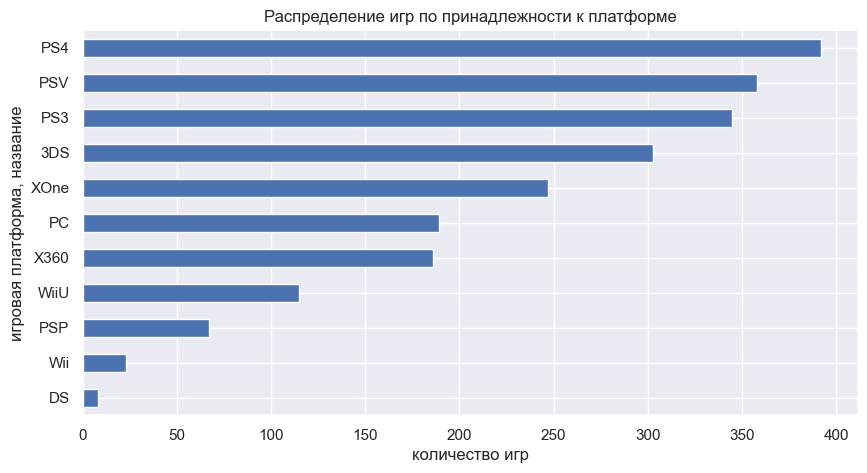

In [1043]:
# Подготовим сводную таблицу продаж по платформам за актуальный период:

games_df_act['platform'].value_counts(ascending=True).plot(kind='barh', figsize=[10,5]);
plt.title('Распределение игр по принадлежности к платформе');
plt.xlabel('количество игр');
plt.ylabel('игровая платформа, название');
plt.show()

In [1225]:
pivot_sales_platform_act = pd.pivot_table(games_df_act, index='platform', values='total_sales', aggfunc='sum')
pivot_sales_platform_act = pivot_sales_platform_act.sort_values(by='total_sales', ascending=False)
print(pivot_sales_platform_act.head())

          total_sales
platform             
PS4            314.14
PS3            181.43
XOne           159.32
3DS            143.25
X360           136.80


In [1046]:
print(top5_sales_list)

['PS2', 'X360', 'PS3', 'Wii', 'DS']


In [1047]:
top_sales_list_act = pivot_sales_platform_act['total_sales'].index.tolist()
print(top_sales_list_act)

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']


Сравнивая полные исторические данные с выборкой за актуальный период, можно сделать выводы:  
- Игры на некогда популярные платформы *'Wii'* и *'DS'* уже почти не продаются;  
- Лидером продаж является игровая платформа *PS4*;
- Платформы *XOne* и *X360* вошли в топ-5 по актуальным продажам.  

Таким образом, лидерами игровой индустрии остаются игры на приставках.   
Sony по-прежнему лидирует.  
XBox One и XBox 360 от Microsoft вытеснили консоли Wii и DS от Nintendo.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [1048]:
top5_sales_list_act = top_sales_list_act[:5]

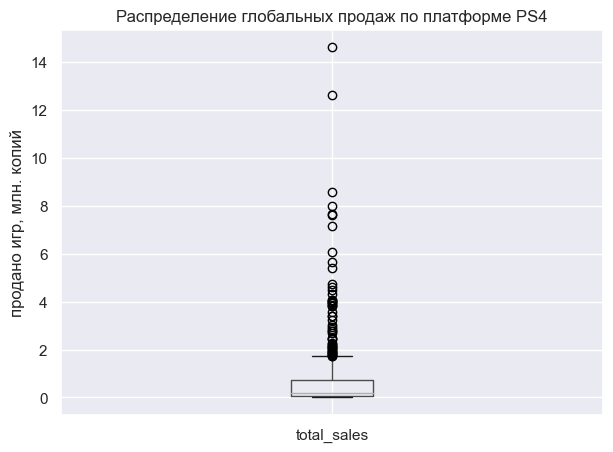

Обзор метрик игровой платформы PS4: 
 count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64


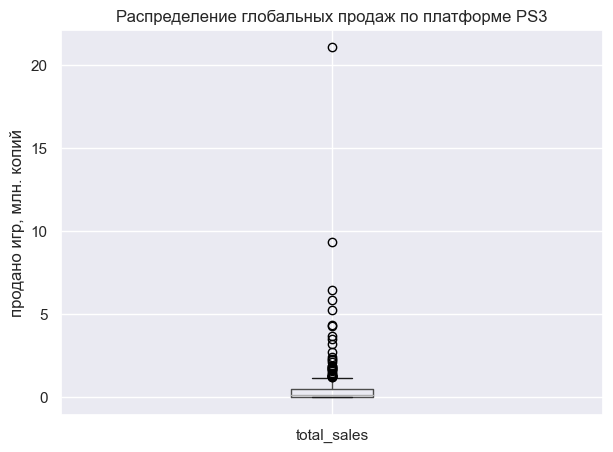

Обзор метрик игровой платформы PS3: 
 count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64


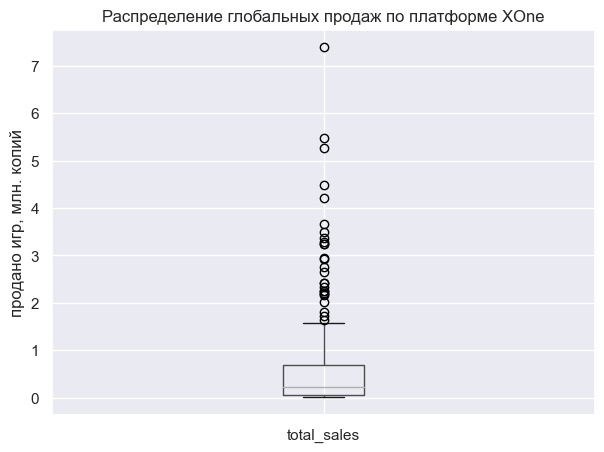

Обзор метрик игровой платформы XOne: 
 count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64


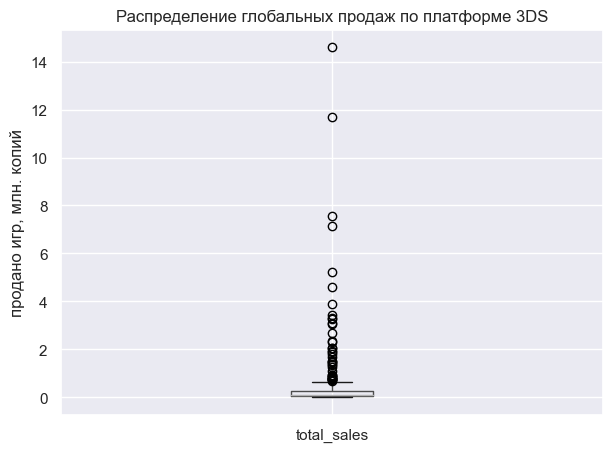

Обзор метрик игровой платформы 3DS: 
 count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64


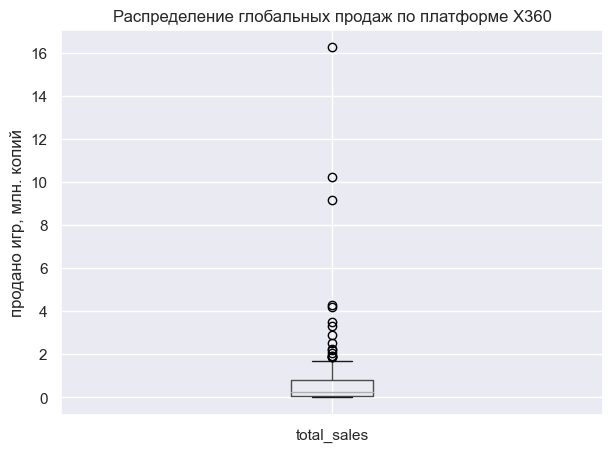

Обзор метрик игровой платформы X360: 
 count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64


In [1049]:
for elem in top5_sales_list_act:
    games_df_act.loc[games_df_act['platform'] == elem].boxplot('total_sales', figsize=(7,5))
    plt.title(f'Распределение глобальных продаж по платформе {elem}')
    plt.ylabel('продано игр, млн. копий')
    plt.show()

    print(f'Обзор метрик игровой платформы {elem}:',
           '\n',
            games_df_act.loc[games_df_act['platform'] == elem]['total_sales'].describe())

In [1050]:
print('Соотношение рекордного числа продаж к мединному значению:')
for elem in top5_sales_list_act:
    print(f'для {elem} -',
          round(games_df_act.loc[games_df_act['platform'] == elem]['total_sales'].max() / games_df_act.loc[games_df_act['platform'] == elem]['total_sales'].median()))

Соотношение рекордного числа продаж к мединному значению:
для PS4 - 73
для PS3 - 140
для XOne - 34
для 3DS - 162
для X360 - 61


Для всех случаев распределения внутри каждой платформы характерна ситуация, согласно которой присутствует несколько "флагманских" продуктов, которые в десятки (а то и сотни) раз превосходят по количеству продаж значения 50 % игр из выборки.  
75 % значений суммарных продаж по платформам лежат в диапазоне 280 - 790 млн. проданных копий.  
Флагманские игры расходятся миллионными тиражами.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Рассмотрим платформу PS4.

In [1051]:
pop_platform_df = games_df_act.query('platform == "PS4"')
pop_platform_sales_scores = pop_platform_df[['critic_score', 'user_score', 'total_sales']]
#display(pop_platform_sales_scores.head())

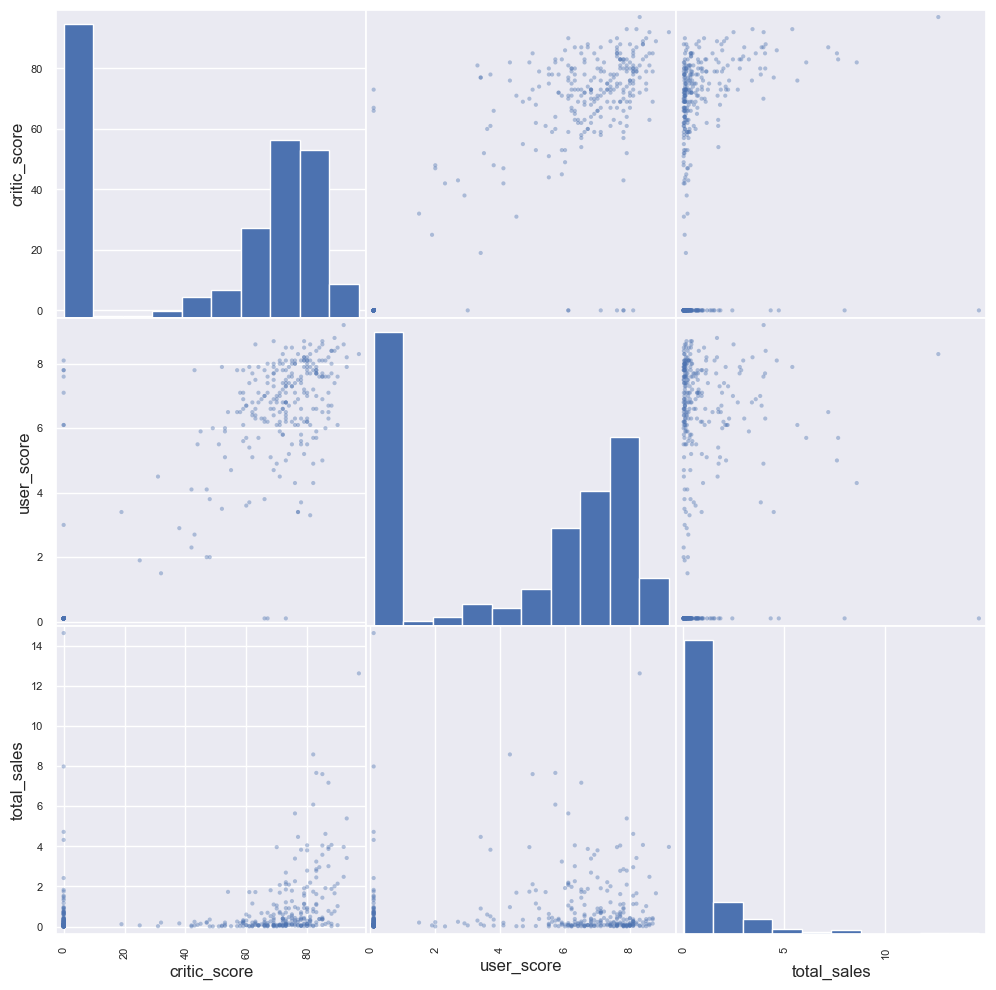

In [1052]:
pd.plotting.scatter_matrix(pop_platform_sales_scores, figsize=(12, 12), alpha=0.4);

In [1053]:
pop_platform_sales_scores.corr()

critic_score  user_score  total_sales
critic_score      1.000000    0.900013     0.227561
user_score        0.900013    1.000000     0.112773
total_sales       0.227561    0.112773     1.000000

Между оценками критиков и пользователей наблюдается сильная прямая корреляция.
На количество продаж в большей степени оказывает влияние оценка критиков, превышая влияние оценки пользователей более чем вдвое.

Соотнесем выводы с продажами игр на других платформах.

In [1054]:
print('Корреляция значений рейтинга критиков, рейтинга пользователей и мировых продаж для остальных платформ из top-5:', '\n')
for elem in top5_sales_list_act[1:]:
    elem_platform_df = games_df_act.loc[games_df_act['platform'] == elem]
    elem_platform_sales_scores = elem_platform_df[['critic_score', 'user_score', 'total_sales']]
    print(f'Для платформы {elem}:', '\n', elem_platform_sales_scores.corr(), '\n')

Корреляция значений рейтинга критиков, рейтинга пользователей и мировых продаж для остальных платформ из top-5: 

Для платформы PS3: 
               critic_score  user_score  total_sales
critic_score      1.000000    0.701176     0.279283
user_score        0.701176    1.000000     0.201621
total_sales       0.279283    0.201621     1.000000 

Для платформы XOne: 
               critic_score  user_score  total_sales
critic_score      1.000000    0.773262     0.274851
user_score        0.773262    1.000000     0.115949
total_sales       0.274851    0.115949     1.000000 

Для платформы 3DS: 
               critic_score  user_score  total_sales
critic_score      1.000000    0.887131     0.061117
user_score        0.887131    1.000000     0.047732
total_sales       0.061117    0.047732     1.000000 

Для платформы X360: 
               critic_score  user_score  total_sales
critic_score      1.000000    0.542329     0.246583
user_score        0.542329    1.000000     0.068447
total_sales   

Во всех наблюдаемых случаях видна прямая выраженная зависимость между оценкой критиков и оценкой пользователей (коэф. корр (r) > 0.5))  
Также прослеживается прямая корреляция между количеством продаж и оценкой критиков (небольшая) и между объемом продаж и оценкой пользователей (незначительная).

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

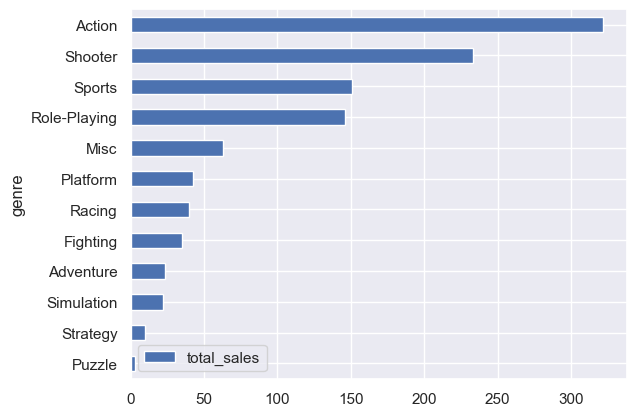

In [1055]:
pivot_genre_sales = pd.pivot_table(
    games_df_act,
    index='genre',
    values='total_sales',
    aggfunc='sum'
).sort_values(
    by='total_sales',
    ascending=True
)
pivot_genre_sales.plot.barh();

In [1056]:
list_top_pivot_genre_sales = pivot_genre_sales[:4].index.tolist()
print(list_top_pivot_genre_sales)

['Puzzle', 'Strategy', 'Simulation', 'Adventure']


In [1057]:
print(pivot_genre_sales.sum())

total_sales    1090.69
dtype: float64


In [1058]:
print(pivot_genre_sales.query('genre == ["Action", "Shooter", "Sports", "Role-Playing"]'))

              total_sales
genre                    
Role-Playing       145.89
Sports             150.65
Shooter            232.98
Action             321.87


К самыми категориям жанра можно отнести *Action*, *Shooter*, *Sports* и *Role-Playing*.  
На "лидера" *Action* приходится около 30% всех продаж.  

Согласно жанровой классификации Орланда, Стейнберга и Томаса, обозначенной в "Руководстве по стилям видеоигр и справочное пособие" от 2007г., можно принять следующие описани жанров игр:  
- Action: имеет акцент на борьбе, включает в себя прохождение определённых уровней для достижения битвы с боссами;  
- Shooter: отличаются неистовым темпом, акцентом на показные бои с использованием оружия и огромным количеством трупов;  
- Sports: отражают соревнования по существующим видам спорта;  
- Role-Playing: сосредоточена на решении проблем, взаимодействии с неигровыми персонажами, участии в боях, статистическом развитии персонажа. 


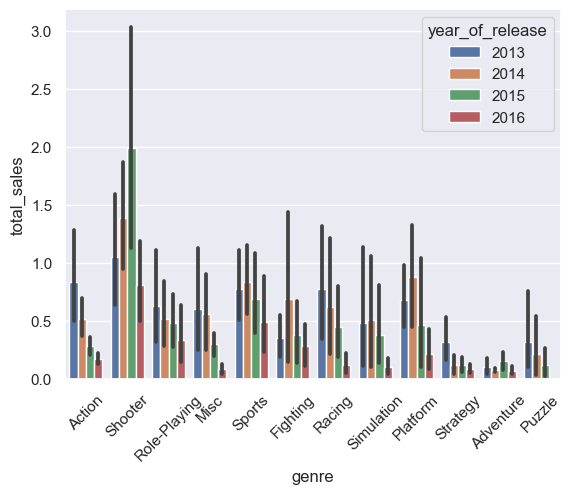

In [1061]:
ax = sns.barplot(y='total_sales',
                 x='genre',
                 hue='year_of_release',
                 data = games_df_act)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Видно, что из года в год соркащается количество проданны копий вне зависимости от жанра.

## Шаг 4. Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).  
Опишем различия в долях продаж.

In [1086]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']
print('Самые популярные платформы (топ-5) среди пользователей региона:', '\n')
for elem in region_list:
    pivot_sales_platform_region = pd.pivot_table(games_df_act,
                                                 index='platform',
                                                 values=elem,
                                                 aggfunc='sum')
    pivot_sales_platform_region = pivot_sales_platform_region.sort_values(by=elem,
                                                                          ascending=False)
    print(pivot_sales_platform_region.head(), '\n')
    print('Наибольшее значение продаж в регионе', pivot_sales_platform_region.max(), '\n')
    print('Суммарное значение продаж в регионе', pivot_sales_platform_region.sum(), '\n')

Самые популярные платформы (топ-5) среди пользователей региона: 

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20 

Наибольшее значение продаж в регионе na_sales    108.74
dtype: float64 

Суммарное значение продаж в регионе na_sales    437.71
dtype: float64 

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96 

Наибольшее значение продаж в регионе eu_sales    141.09
dtype: float64 

Суммарное значение продаж в регионе eu_sales    392.23
dtype: float64 

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88 

Наибольшее значение продаж в регионе jp_sales    67.81
dtype: float64 

Суммарное значение продаж в регионе jp_sales    140.78
dtype: float64 



Рассмотрев данные о количестве проданных игр (рапределение по игромым платформам) в представленных регионах, можно сказать, что:  
- в Северной Америке чаще всего играют на PS4 - это четверть рынка. А вообще копий игр для платформ PS (Sony, Япония) и XBox (Microsoft, США) продано приблизительно одинаковое количество;
- в европе количество игроков на PS4 более чем в 2 раза превышает число игроков любой другой платформы, на нее приходится больше трети проданных игр;
- в Японии по кол-ву продаж лидирует DS3 (Nintendo, японская компания) - почти каждая вторая игра покупалась под нее. На DS приходится почти столько же, сколько суммарно на все остальные платформы из топ-5.   
- В отличии от европы и америки, в Японии еще представлена платформа WiiU.

### Определим для пользователя каждого региона самые популярные жанры (топ-5). Поясним разницу.

In [1087]:
print('Самые популярные жанры (топ-5) среди пользователей региона:', '\n')
for elem in region_list:
    pivot_sales_genre_region = pd.pivot_table(games_df_act,
                                                 index='genre',
                                                 values=elem,
                                                 aggfunc='sum')
    pivot_sales_genre_region = pivot_sales_genre_region.sort_values(by=elem,
                                                                    ascending=False)
    print(pivot_sales_genre_region.head(), '\n')
    print('Наибольшее значение продаж в регионе', pivot_sales_genre_region.max(), '\n')
    print('Суммарное значение продаж в регионе', pivot_sales_genre_region.sum(), '\n')

Самые популярные жанры (топ-5) среди пользователей региона: 

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49 

Наибольшее значение продаж в регионе na_sales    126.05
dtype: float64 

Суммарное значение продаж в регионе na_sales    437.71
dtype: float64 

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19 

Наибольшее значение продаж в регионе eu_sales    118.13
dtype: float64 

Суммарное значение продаж в регионе eu_sales    392.23
dtype: float64 

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61 

Наибольшее значение продаж в регионе jp_sales    51.04
dtype: float64 

Суммарное значение продаж в регионе jp_sales    140.78
dtype: float64 



Рассмотрев данные о количестве проданных игр (рапределение по жанрам) в представленных регионах, можно сказать, что:  
- У американцев и европейцев очень схожие предпочтения: первые 4 жанра из топ-5 повторяются в обоих случаях и одинаково популярны!   
- Более половины игроков в Северной Америке и европе выбирают игры жанров Action и Shooter.  
- Компьютерные ролевые игры чаще всего выбирают японцы: 36 % от общего числа проданных экземпляров.  
Такую же долю в этом регионе составляют игры жанров Action и Shooter вместе взятые (36 %).  

Разницу в предпочтениях между представителями европеоидной расы и монголоидной расы, возможно, получится объяснить культурными или ментальными аспектами.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности которой заключается в принятии и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Значения рейтинга ESRB:  
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет;
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет);  
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;  
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;  
- «AO» («Adults Only 18+») — «Только для взрослых».  

Аббревиатура *tbd* означает, что значение рейтинга не присвоено или находится в процессе определения.

        na_sales
rating          
M         165.21
tbd        89.42
E          79.05
E10+       54.24
T          49.79 

Общее число продаж в регионе na_sales    437.71
dtype: float64 



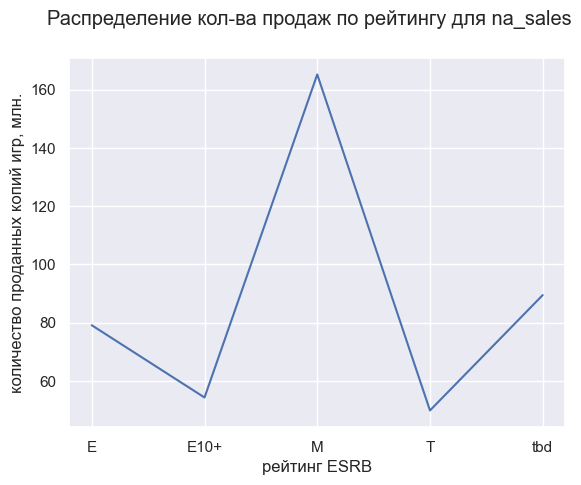

        eu_sales
rating          
M         145.32
E          83.36
tbd        78.91
E10+       42.69
T          41.95 

Общее число продаж в регионе eu_sales    392.23
dtype: float64 



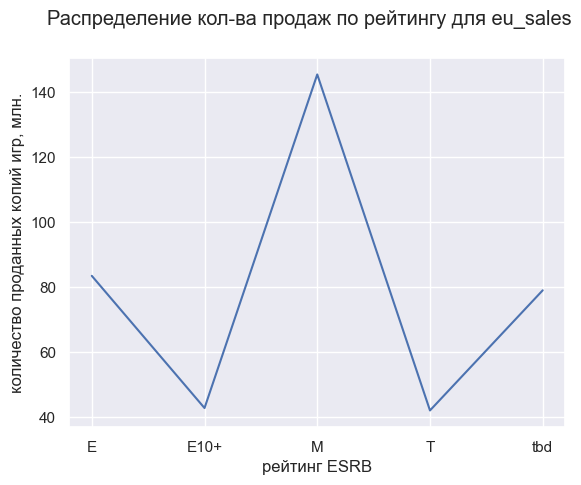

        jp_sales
rating          
tbd        85.05
T          20.59
E          15.14
M          14.11
E10+        5.89 

Общее число продаж в регионе jp_sales    140.78
dtype: float64 



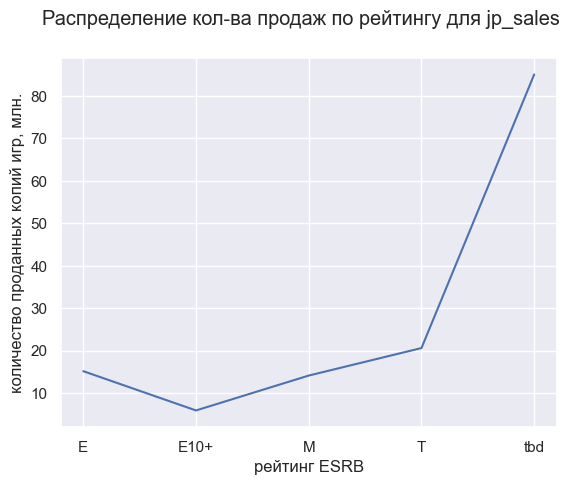

In [1115]:
for elem in region_list:
    pivot_sales_rating_region = pd.pivot_table(games_df_act,
                                                 index='rating',
                                                 values=elem,
                                                 aggfunc='sum')
    pivot_sales_rating_region = pivot_sales_rating_region.sort_values(by=elem,
                                                                    ascending=False)
    print(pivot_sales_rating_region, '\n')
    print('Общее число продаж в регионе', pivot_sales_rating_region.sum(), '\n')
    
    pivot_sales_rating_region_df = pd.pivot_table(games_df_act, index='rating', values=elem, aggfunc='sum')
    
    fig, axs = plt.subplots(nrows=1, ncols=1)
    fig. suptitle(f'Распределение кол-ва продаж по рейтингу для {elem}')
    axs.plot(pivot_sales_rating_region_df)
    plt.xlabel('рейтинг ESRB')
    plt.ylabel('количество проданных копий игр, млн.')
    plt.show()

- В Северной Америке и европе распределение продаж по рейтингу схожее - игр с рейтингом *'M'* (для лиц не младше 17 лет) продано больше всего - по 37% в обоих регионах. Показатели продаж по играм с рейтингами *'E10'* и *'T'* здесь минимальны.
- В Японии же самыми продаваемыми являются игры с присвоенным рейтингом *'T'* (с 13 лет) и *'E'* (без ограничения по возрасту). Однако у трех из пяти игр здесь рейтинг отсутствует.

Возможно, американо-канадская ESRB слабо охватывает рынок японии, где у 60 % игр её рейтинг отсутствует.  
У американцев и европейцев рейтинг присвоен 4 из 5 играм.

## Шаг 5. Проверим гипотезы

Нулевую гипотезу H0 будем формулировать так, чтобы использовать знак равенства. Например, если мы исследуем, равна ли некоторая величина определённому числу, то нулевая гипотеза будет предполагать, что равна.

### Гипотеза №1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".  

Основная гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.  

В нашем случае нужно сравнить средние двух генеральных совокупностей между собой.

In [1160]:
# Создадим из общего датафрейма локальные, содержащие информацию только по определенной платфороме: 

games_df_act_xone = games_df_act.query('platform == "XOne"')
games_df_act_pc = games_df_act.query('platform == "PC"')

In [1150]:
# Проверим размеры выборки:

print('Число значений рейтинга для игр на платформе Xbox One:', len(games_df_act_xone['user_score']), '\n')
print('Число значений рейтинга для игр на PC:', len(games_df_act_pc['user_score']))

Число значений рейтинга для игр на платформе Xbox One: 247 

Число значений рейтинга для игр на PC: 189


В обоих случаях размеры выборок достаточно велики (> 30 значений) - имеем приближенное к нормальному t-распределение Стьюдента. Можно проводить t-test.

In [1164]:
# коэф. статистической значимости:
alpha = 0.01 
# если p-value окажется меньше него, отвергнем гипотезу

# наборы значений, которые содержат выборки:
xone = games_df_act_xone['user_score']
pc = games_df_act_pc['user_score']

# для двусторонней альтернативной гипотезы и приблизительно равными по размеру выборками:
results = st.ttest_ind(xone, pc, alternative = 'two-sided', equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.25480942465773193
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
В результате проведения t-теста у нас не получилось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ *Xbox One* и *PC*.   
Значение p-value сильно превосходит alpha = 0.05.

### Гипотеза №2: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Основная гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports разные.  

Здесь также нужно сравнить средние двух генеральных совокупностей между собой.

In [1161]:
# Создадим из общего датафрейма локальные, содержащие информацию только по определенному жанру: 

games_df_act_action = games_df_act.query('genre == "Action"')
games_df_act_sporst = games_df_act.query('genre == "Sports"')

In [1162]:
# Проверим размеры выборки:

print('Число значений рейтинга для игр жанра "Action":', len(games_df_act_action['user_score']), '\n')
print('Число значений рейтинга для игр жанра "Sports":', len(games_df_act_sporst['user_score']))

Число значений рейтинга для игр жанра "Action": 766 

Число значений рейтинга для игр жанра "Sports": 214


In [1169]:
alpha = 0.05

action = games_df_act_action['user_score']
sporst = games_df_act_sporst['user_score']

# для двусторонней альтернативной гипотезы и неравными выборками:
results = st.ttest_ind(action, sporst, alternative = 'two-sided', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.06234004040236611
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
В результате проведения t-теста у нас не получилось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ *Xbox One* и *PC*.  
Значение p-value (0.062) незначительно превосходит alpha (0.05) - можно сказать, что это пограничное значение, и при чуть большем коэффициенте статистической значимости (например, 0.07) нулевая гипотеза H0 была бы отвергнута в пользу альтернативной H1.

## Шаг 6. Общий вывод

В нашем распоряжении оказались данные по играм, вышедшим с 1980 по 2016 годы, половина из которых вышла до 2008 г. Явные дубликаты в данных отсутствуют.
Величина исходного массива составляет 16715 строк. Колонки с данными о продажах и 'Platform' не имеют пропусков, но выявлено много пропусков в 'Critic_Score', 'User_Score' и 'Rating'. Пропущеные значения рейтинга ESRB были заменены на "tbd". Две строки датафрейма были удалены. В итоге осталось 16713 строки.

75 % игр проданы в размере не превышающем 470 тыс. копий. Максимальное значение продаж для одной игры - 82 млн 540 тыс. копий.
Локальные максимумы графика распределения отмечаются на 1998 (379 игр), 2002 (829 игр) и 2008-2009 (1426-1427 игр) годах.
В целом индустрия игр до начала 1990-х годов была слабо представлена, ее рост начался в середине последнего десятилетия 20 века.
В начале 2000-х произошло кратное увеличение игрового рынка, а пиковое значение приходится на 2008 год: было выпущено 1427 игр. Столь бурный рост индустрии можно объяснить темпами развития технологий (как "железа", так и совершенствованием языков программирования), широкой доступностью персональных компьютеров, массового доступа к интернету. Последующий спад, возможно, связан с усложнением процесса созданя самих игр (требования к сюжету, элементам графики), изменением платформ - общим увеличением цикла создания игры.
Стоит отметить, что на 2008-2009 годы приходится мировой финансовый кризис (одна из волн), который мог создать предпосылки для оптимизации затрат на продукт, сокращения штата разработчиков. Вероятно, что по мере роста индустрии и вследствие конкуренцции, рынок заняли крупные игроки, обладающие ресурсами, нацеленные на уменьшение количества выпускаемых игр в пользу их качества.

Вследствие перечисленных выше обстоятельств, для анализа приняты данные за актуальный период (с 2013 года). Наиболее современными являются платформы Wii, PS4, 3DS, XONE, WiiU, PSV - на них выпускают игры с 2010-х годов, а платформа PC актуальна во все времена.

Медианное время жизни платформы составляет 8 лет, среднее - 8.2 года.
Несколько платформ жили всего 1-2 года, компьютерные же игры были всегда.
Чаще, чем раз в год (приблизительно раз в 10-11 месяцев) появляется новая игровая платформа
Суммарное значение проданных игр из top-5 игровых платформ: 4880.47 млн. копий
Рекорд: за всю историю на PS2 от Sony было продано более 1.25 млрд. копий игр.
У лидеров по продажам среди игровых платформ (чей оборот находится в диапазоне 150 - 210 млн. проданных копий в год) время жизни составляет 12-13 лет, что выше среднего показателя по всем платформам в 1.5 раза.

Актуальным периодом для анализа и дальнейших прогнозов можно считать 10-11 лет. Для дальнейших расчетов принят временной интервал с 2013 года.
Принимая тот факт, что пиковые значения покупок игр на определенной платформе выявляются спустя 5-6 лет после её "ввода в эксплуатацию", для игр на PS4, WiiU и XOne на 2017-2018 годы можно прогнозировать максимальные продажи, после чего последует спад. К середине 2020-х годов они будут постепенно вытесняться другими.
Переходным периодом между поколениями платформ разработчика можно считать 3-4 года.

По состоянию на 2024 год на рынке широко представлены игры на PS4/PS5, PC и Nintendo Switch.

Сравнивая полные исторические данные с выборкой за актуальный период, можно сделать выводы:
- Игры на некогда популярные платформы 'Wii' и 'DS' уже почти не продаются;
- Лидером продаж является игровая платформа PS4;
- Платформы XOne и X360 вошли в топ-5 по актуальным продажам.
Таким образом, лидерами игровой индустрии остаются игры на приставках. Sony по-прежнему лидирует. XBox One и XBox 360 от Microsoft вытеснили консоли Wii и DS от Nintendo.

Для всех случаев распределения внутри каждой платформы характерна ситуация, согласно которой присутствует несколько "флагманских" продуктов, которые в десятки (а то и сотни) раз превосходят по количеству продаж значения 50 % игр из выборки.
75 % значений суммарных продаж по платформам лежат в диапазоне 280 - 790 млн. проданных копий.
Флагманские игры расходятся миллионными тиражами.

Между оценками критиков и пользователей наблюдается сильная прямая корреляция. На количество продаж в большей степени оказывает влияние оценка критиков, превышая влияние оценки пользователей более чем вдвое. Во всех наблюдаемых случаях видна прямая выраженная зависимость между оценкой критиков и оценкой пользователей (коэф. корр (r) > 0.5))
Также прослеживается прямая корреляция между количеством продаж и оценкой критиков (небольшая) и между объемом продаж и оценкой пользователей (незначительная).

К самыми продаваемым категориям жанра можно отнести Action, Shooter, Sports и Role-Playing.
На "лидера" Action приходится около 30% всех продаж.
Из года в год соркащается количество проданны копий вне зависимости от жанра, тренд нисходящий.

Рассмотрев данные о количестве проданных игр (рапределение по игромым платформам) в Северной Америке, европе и Японии, можно сказать, что:

- в Северной Америке чаще всего играют на PS4 - это четверть рынка. А вообще копий игр для платформ PS (Sony, Япония) и XBox (Microsoft, США) продано приблизительно одинаковое количество;
- в европе количество игроков на PS4 более чем в 2 раза превышает число игроков любой другой платформы, на нее приходится больше трети проданных игр;
- в Японии по кол-ву продаж лидирует DS3 (Nintendo, японская компания) - почти каждая вторая игра покупалась под нее. На DS приходится почти столько же, сколько суммарно на все остальные платформы из топ-5.
- В отличии от европы и америки, в Японии еще представлена платформа WiiU.

Рассмотрев данные о количестве проданных игр (рапределение по жанрам) в представленных регионах, можно сказать, что:

- у американцев и европейцев очень схожие предпочтения: первые 4 жанра из топ-5 повторяются в обоих случаях и одинаково популярны!
- более половины игроков в Северной Америке и европе выбирают игры жанров Action и Shooter;
- компьютерные ролевые игры чаще всего выбирают японцы: 36 % от общего числа проданных экземпляров. Такую же долю в этом регионе составляют игры жанров Action и Shooter вместе взятые (36 %).
Разницу в предпочтениях между представителями европеоидной расы и монголоидной расы, возможно, получится объяснить культурными или ментальными аспектами.

В Северной Америке и европе распределение продаж по рейтингу ESRB (Entertainment Software Rating Board) схожее: игр с рейтингом 'M' (для лиц не младше 17 лет) продано больше всего - по 37% в обоих регионах. Показатели продаж по играм с рейтингами 'E10' и 'T' здесь минимальны.
В Японии же самыми продаваемыми являются игры с присвоенным рейтингом 'T' (с 13 лет) и 'E' (без ограничения по возрасту). Однако у трех из пяти игр здесь рейтинг отсутствует.
Возможно, американо-канадская ESRB слабо охватывает рынок японии, где у 60 % игр её рейтинг отсутствует.
У американцев и европейцев рейтинг присвоен 4 из 5 играм.

В результате проверки нам не удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Значение p-value сильно превосходит alpha = 0.05.

Также в результате проверки нам не удалось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Однако, при чуть большем коэффициенте статистической значимости нулевая гипотеза H0 была бы отвергнута в пользу альтернативной H1.